Text(0.5, 1.0, 'Predicted Labels')

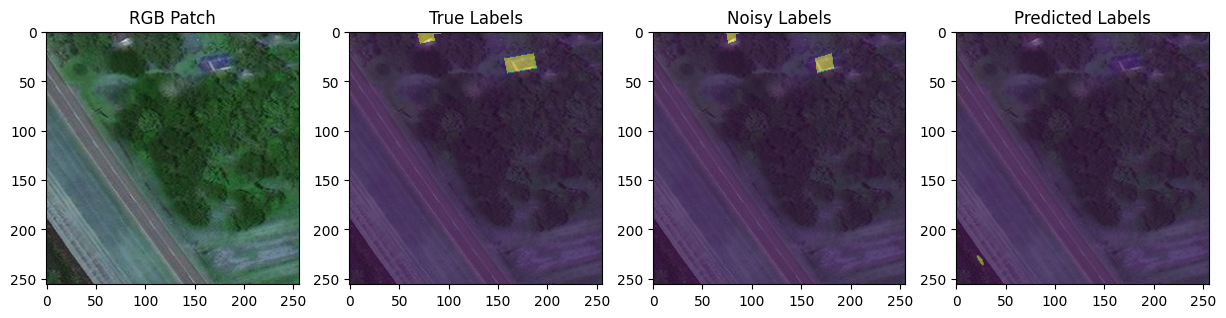

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import random
import cv2

## Make plots to view
datacentric_rgb_patches = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/training_patches")
datacentric_true_labels = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/training_labels")
datacentric_noisy_labels = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/training_noisy_labels")
datacentric_pred_labels = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/inferenced_pred_labels")

## Obtain their files
rgb_patches_files = sorted(list(datacentric_rgb_patches.glob("*.png")))
true_labels_files = sorted(list(datacentric_true_labels.glob("*.png")))
noisy_labels_files = sorted(list(datacentric_noisy_labels.glob("*.png")))
pred_labels_files = sorted(list(datacentric_pred_labels.glob("*.png")))

## Choice some images
random_indice = random.sample(range(0, len(rgb_patches_files)), 4)

rgb_patches_file = rgb_patches_files[random_indice[0]]
true_labels_file = true_labels_files[random_indice[0]]
noisy_labels_file = noisy_labels_files[random_indice[0]]
pred_labels_file = pred_labels_files[random_indice[0]]


fig, ax = plt.subplots(1, 4, figsize=(15, 10))
ax[0].imshow(cv2.imread(str(rgb_patches_file), cv2.IMREAD_COLOR))
ax[0].set_title("RGB Patch")

ax[1].imshow(cv2.imread(str(rgb_patches_file), cv2.IMREAD_COLOR))
# Contours
contours = cv2.findContours(cv2.imread(str(true_labels_file), cv2.IMREAD_GRAYSCALE), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
for contour in contours:
    cv2.drawContours(cv2.imread(str(true_labels_file), cv2.IMREAD_GRAYSCALE), [contour], -1, (0, 255, 0), 3)
ax[1].imshow(cv2.imread(str(true_labels_file), cv2.IMREAD_GRAYSCALE), alpha=0.5)
ax[1].set_title("True Labels")

ax[2].imshow(cv2.imread(str(rgb_patches_file), cv2.IMREAD_COLOR))
# Contours
contours = cv2.findContours(cv2.imread(str(noisy_labels_file), cv2.IMREAD_GRAYSCALE), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
for contour in contours:
    cv2.drawContours(cv2.imread(str(noisy_labels_file), cv2.IMREAD_GRAYSCALE), [contour], -1, (0, 255, 0), 3)
ax[2].imshow(cv2.imread(str(noisy_labels_file), cv2.IMREAD_GRAYSCALE), alpha=0.5)
ax[2].set_title("Noisy Labels")

ax[3].imshow(cv2.imread(str(rgb_patches_file), cv2.IMREAD_COLOR))
# Contours
contours = cv2.findContours(cv2.imread(str(pred_labels_file), cv2.IMREAD_GRAYSCALE), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
for contour in contours:
    cv2.drawContours(cv2.imread(str(pred_labels_file), cv2.IMREAD_GRAYSCALE), [contour], -1, (0, 255, 0), 3)
ax[3].imshow(cv2.imread(str(pred_labels_file), cv2.IMREAD_GRAYSCALE), alpha=0.5)
ax[3].set_title("Predicted Labels")

plt.axis("off")
plt.tight_layout()
plt.show()

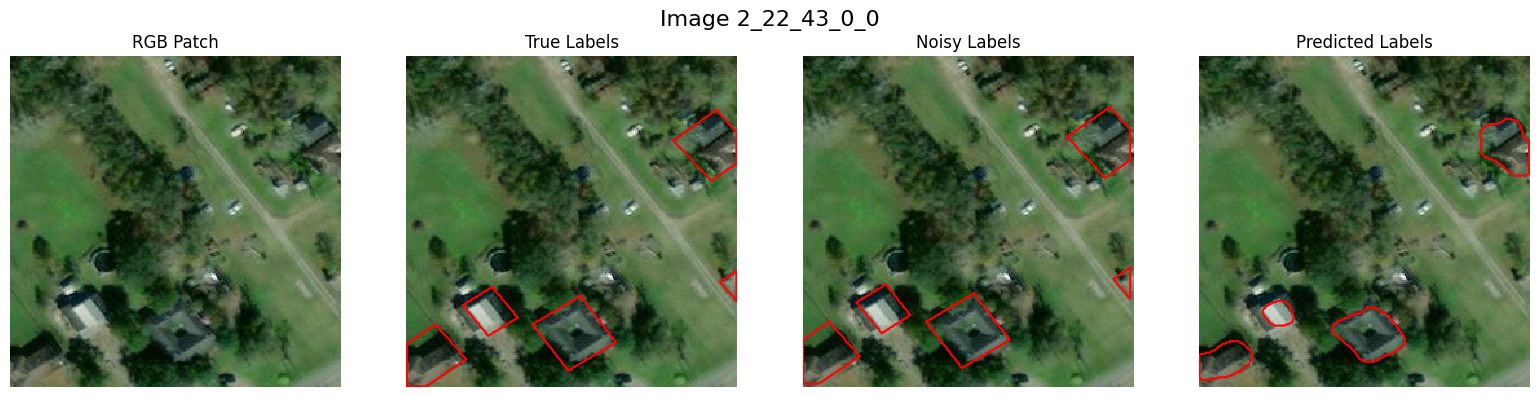

In [23]:
import pathlib
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np

# Paths
datacentric_rgb_patches = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/training_patches")
datacentric_true_labels = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/training_labels")
datacentric_noisy_labels = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/training_noisy_labels")
datacentric_pred_labels = pathlib.Path("/media/tidop/Datos_4TB1/databases/full_dataset/dataset/inferenced_pred_labels")

# File lists
rgb_files   = sorted(datacentric_rgb_patches.glob("*.png"))
true_files  = sorted(datacentric_true_labels.glob("*.png"))
noisy_files = sorted(datacentric_noisy_labels.glob("*.png"))
pred_files  = sorted(datacentric_pred_labels.glob("*.png"))

# Select a random index
# 4881, 2805, 4180, 4780, 3752, 1240
idx = 4881

# Read images once
rgb = cv2.cvtColor(cv2.imread(str(rgb_files[idx])), cv2.COLOR_BGR2RGB)
true_mask  = cv2.imread(str(true_files[idx]), cv2.IMREAD_GRAYSCALE)
noisy_mask = cv2.imread(str(noisy_files[idx]), cv2.IMREAD_GRAYSCALE)
pred_mask  = cv2.imread(str(pred_files[idx]), cv2.IMREAD_GRAYSCALE)

# Prepare plot
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
titles = ["RGB Patch", "True Labels", "Noisy Labels", "Predicted Labels"]
masks  = [true_mask, noisy_mask, pred_mask]

for i, ax in enumerate(axs):
    ax.imshow(rgb, interpolation='nearest')
    ax.set_title(titles[i])
    ax.axis('off')
    if i > 0:
        mask = masks[i-1]
        # Binary where mask == 1
        binary = (mask == 1.0).astype(np.uint8) * 255
        # Find contours
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Plot each contour in red
        for cnt in contours:
            pts = cnt.reshape(-1, 2)
            # Si no está cerrado, añade el primer punto al final
            if not np.array_equal(pts[0], pts[-1]):
                pts = np.vstack([pts, pts[0]])
            # Dibuja la línea roja (cerrada)
            ax.plot(pts[:, 0], pts[:, 1], color='red', linewidth=1.5)

fig.suptitle(f"Image {true_files[idx].name.split('.')[0]}", fontsize=16)
plt.tight_layout()
plt.show()